<a href="https://colab.research.google.com/github/fatihtayfun/fatihtayfun/blob/main/Covid19_X_Ray_Images_Classification_ipynb(NEWESTDATASET)ALEXNET_batchsize_512_200x200_adl%C4%B1_dosyan%C4%B1n_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Utils
from tqdm import tqdm
import datetime

# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, AveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# ResNet Model

In [ ]:
import numpy as np
import pandas as pd
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import shutil
from sklearn.metrics import confusion_matrix, classification_report
# we added the separation an

In [ ]:
import tensorflow as tf
#Our base model is InceptionResNetV2, new readers are encouraged to see the architecture of this particular model

base_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (299,164,3),
                                                     include_top=False)
for layer in base_model.layers:
    layer.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model, 
    tf.keras.layers.GlobalAveragePooling2D(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("covid_classifier_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 10, 6, 2048)       23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

# New Dataset

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from keras import layers, models
from tensorflow.keras import activations

####### Generatiiing Data

#batch_size = 32
#batch_size = 64
#batch_size = 128
batch_size = 512

image_weight = 200 
image_height = 200

train_datagen = ImageDataGenerator(rescale=1./255)                           
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/newest_dataset(train-5k,test-1.2k-val-1k)/NEWEST_DATASET/train',  ## COV19-XRay Training set (10k(5kCovid & 5kNormal) Images)
        target_size=(image_weight , image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/drive/MyDrive/newest_dataset(train-5k,test-1.2k-val-1k)/NEWEST_DATASET/val',  ## COV19-XRay Validation set (2k(1kNormal & 1kCovid) images)
        target_size=(image_weight , image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Fitting Model

In [ ]:
history = model.fit(train_generator, 
                    validation_data=val_generator, epochs=20, 
                    callbacks=[callbacks])

Epoch 1/20
40/40 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.8547 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


40/40 [==============================] - 1849s 46s/step - loss: 0.3388 - accuracy: 0.8547 - val_loss: 0.2402 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 2/20
40/40 [==============================] - 1587s 40s/step - loss: 0.1979 - accuracy: 0.9229 - val_loss: 0.2697 - val_accuracy: 0.8955 - lr: 0.0010
Epoch 3/20
40/40 [==============================] - 1611s 40s/step - loss: 0.1586 - accuracy: 0.9378 - val_loss: 0.1719 - val_accuracy: 0.9380 - lr: 0.0010
Epoch 4/20
40/40 [==============================] - 1616s 41s/step - loss: 0.1312 - accuracy: 0.9520 - val_loss: 0.1810 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 5/20
40/40 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9592 
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
40/40 [==============================] - 1601s 40s/step - loss: 0.1159 - accuracy: 0.9592 - val_loss: 0.1890 - val_accuracy: 0.9275 - lr: 0.0010
Epoch 6/20
40/40 [==============================] - 1640s 41s/step 

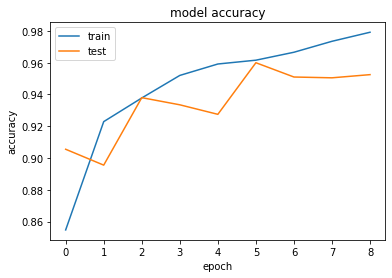

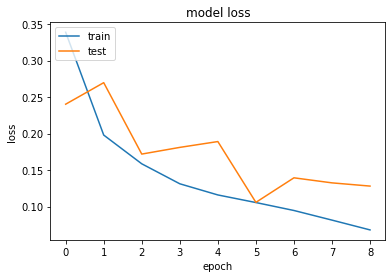

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Creating Test Data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)                           
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/data/smallerData/test',  ## COV19-XRay Test set (3k(1.5Covid & 1.5Normal) Images)
        target_size=(image_weight, image_height),
        batch_size=batch_size,
        classes = ['covid','normal'],
        class_mode='binary')

Found 3000 images belonging to 2 classes.


###Evaluation Of Model

In [ ]:
model.load_weights("./covid_classifier_model.h5")
model.evaluate(test_generator)

12/12 [==============================] - 421s 35s/step - loss: 0.3638 - accuracy: 0.8600


[0.36380892992019653, 0.8600000143051147]

# **Build AlexNet**

In [ ]:
# Common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Utils
from tqdm import tqdm
import datetime

# Sklearn
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, AveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:
def create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)
        
create_dir('models')

In [ ]:
resize_and_rescale = Sequential([
    Resizing(200,200),
    Rescaling(1./255)
])

In [ ]:
metrics = [TruePositives(name='TP'),
           TrueNegatives(name='TN'),
           FalsePositives(name='FP'),
           FalseNegatives(name='FN'),
           AUC(curve='PR', name='AUC')]

In [ ]:
lamb = 0.9

model = Sequential([
    # Preprocessing layer
    resize_and_rescale,
    
    InputLayer((200, 200, 3)),
    
    # 1st layer
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', kernel_regularizer=l2(lamb), name='conv1'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # 2nd layer
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv2'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # 3rd layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv3'),
    BatchNormalization(),
    
    # 4th layer
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv4'),
    BatchNormalization(),
    
    # 5th layer
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', kernel_regularizer=l2(lamb), name='conv5'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'),
    BatchNormalization(),
    
    # Flatten
    Flatten(),
    
    # 6th layer
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    
    # 7th layer
    Dense(units=4096, activation='relu'),
    Dropout(0.5),
    
    # 8th layer (output)
    Dense(units=1, activation='sigmoid')
], name='AlexNet')

In [ ]:
#Create folder contains model's files
model_dir = 'models/alexnet'
model_file = 'best_alexnet.hdf5'
create_dir(model_dir)

checkpoint = ModelCheckpoint(os.path.join(model_dir, model_file),
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=30,
                               verbose=1,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), 
                              patience=7, min_delta=1e-3, verbose=1, min_lr=1e-7)

In [ ]:
# Initialize TensorBoard
log_dir = 'models/alexnet/logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
batch_size = 512
epochs = 200
lr = 1e-3

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=metrics)

training_time_start = datetime.datetime.now()

history = model.fit(train_generator,
                                epochs=epochs,
                                verbose=1,
                                callbacks=[checkpoint, early_stopping, reduce_lr, tensorboard_callback],
                                validation_data=val_generator,
                                steps_per_epoch=len(train_generator),
                                validation_steps=len(val_generator))

training_time_end = datetime.datetime.now()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
 9/10 [==========================>...] - ETA: 4:02 - loss: 751.6093 - TP: 1506.0000 - TN: 1379.0000 - FP: 850.0000 - FN: 753.0000 - AUC: 0.6814

In [ ]:
from tensorflow.keras.metrics import AUC, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

In [ ]:
y_test = test_generator.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:",accuracy_score(y_test, pred2)*100,"%")

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')

In [ ]:
# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(testy, yhat_classes)

print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)

precision = precision_score(testy, yhat_classes)

print('Precision: %f' % precision)

# recall: tp / (tp + fn)

recall = recall_score(testy, yhat_classes)

print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)

f1 = f1_score(testy, yhat_classes)

print('F1 score: %f' % f1)